# Table of Contents
### 01: Import Libraries and Data
### 02: The Elbow Technique
### 03: K-Means Clustering

# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
path = r'/Users/Katherine/Desktop/House Sales'

In [3]:
#Import clean data
df = pd.read_csv(os.path.join(path, 'housing_data_clean.csv'), index_col = False)

In [4]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 02. The Elbow Technique

In [5]:
#create a subset of data for k-means algorithm
sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'waterfront', 'grade', 'yr_built']]

In [6]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [7]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

/Users/katherine/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katherine/anaconda3/envs/notebook/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/katherine/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

In [8]:
score

[-2949932200337781.5,
 -1391501106115022.0,
 -766995320108224.0,
 -497454263836757.9,
 -360848006440721.2,
 -277163016491566.44,
 -216082399659373.62,
 -172714977296648.97,
 -146902204441503.12]

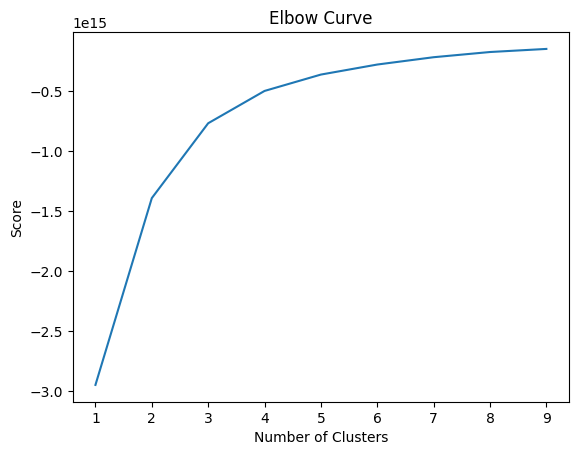

In [9]:
#plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will use four clusters for my k-means algorithm because there is a slight jump from 3 to 4 and then the curve begins to straighten out, so 4 is the optimal count of clusters to use.

# 03. K-Means Clustering

In [10]:
#create the k-means object
kmeans = KMeans(n_clusters = 4) 

In [11]:
#fit the k-means object to the data
kmeans.fit(sub)

/Users/katherine/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [12]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/katherine/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_97370/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [13]:
sub.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,waterfront,grade,yr_built,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1955,3
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,1951,0
2,180000.0,2,1.00,770,10000,1.0,0,0,6,1933,3
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1987,3


In [14]:
sub['clusters'].value_counts()

clusters
3    12937
0     7252
1     1229
2      190
Name: count, dtype: int64

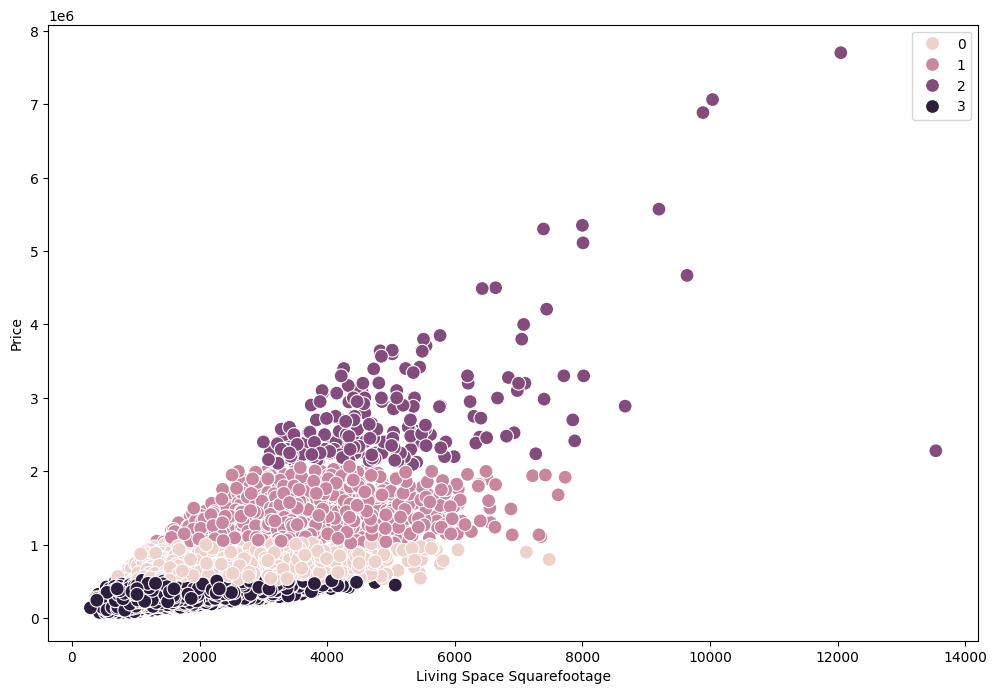

In [15]:
#plot the clusters for the "price" and "sqft_living" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['sqft_living'], y=sub['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Living Space Squarefootage')
plt.ylabel('Price') 
plt.show()

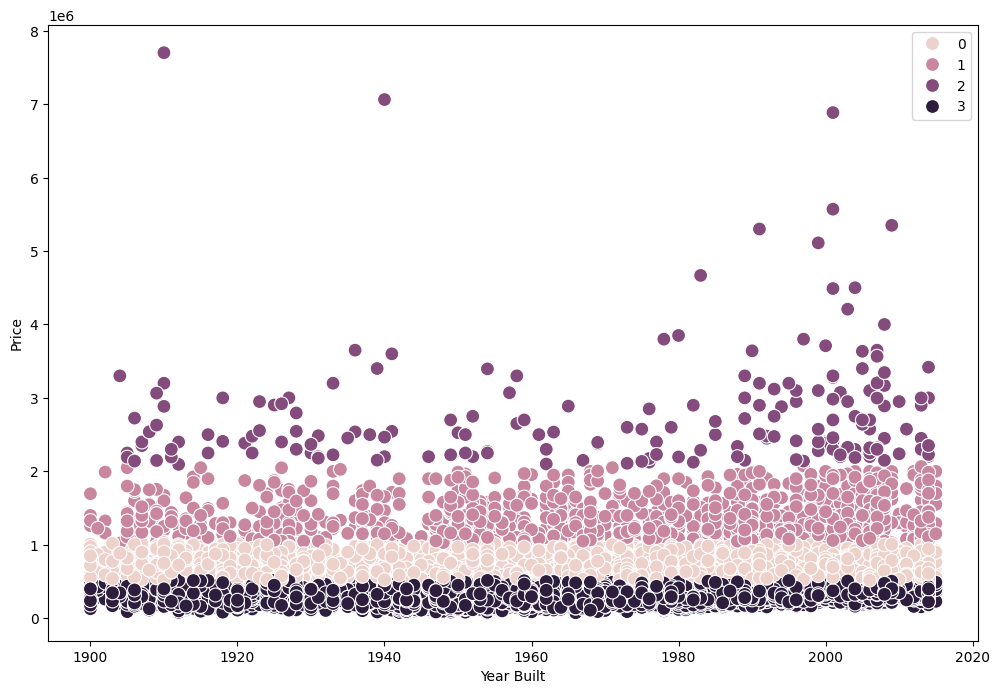

In [16]:
#plot the clusters for the "price" and "yr_built" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['yr_built'], y=sub['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Year Built')
plt.ylabel('Price') 
plt.show()

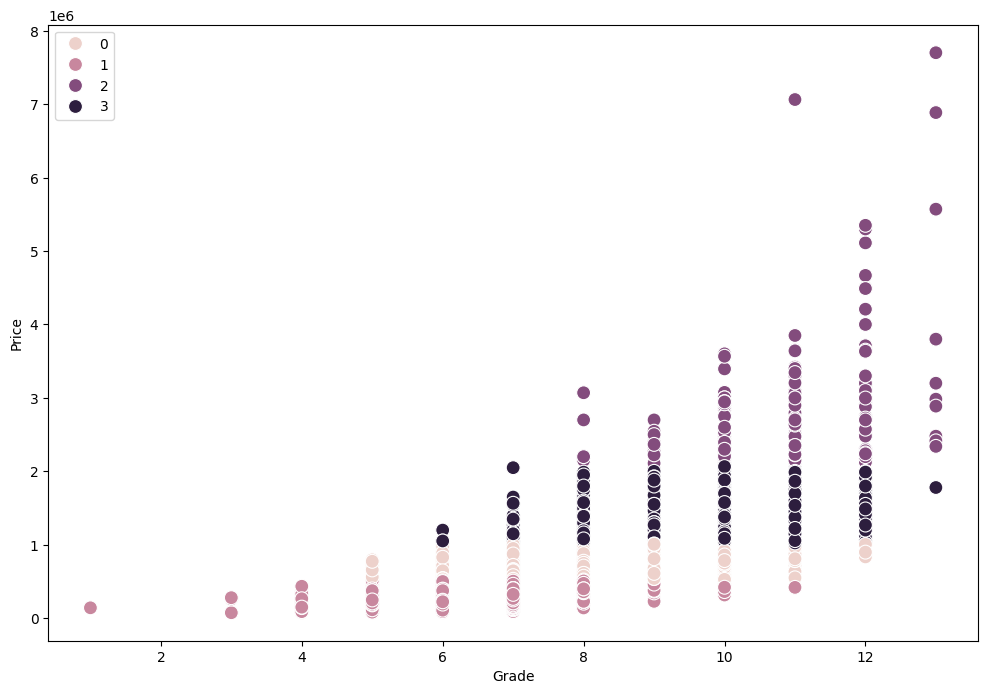

In [17]:
#plot the clusters for the "price" and "grade" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['grade'], y=sub['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Grade')
plt.ylabel('Price') 
plt.show()

There are four clusters and the light pink (0) represent lower priced homes, followed by purple (2), pink (1), and then the highest priced homes are dark purple (3). . The first cluster showing price vs. sqft_living shows that most homes under 5,000 sqft can be found in all the price ranges, but only houses over 8,000sqft are in the high price purple cluster. There is no connection between price and year built as all the clusters spread across every year.

In [18]:
sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'light pink'

/tmp/ipykernel_81129/121779135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'
/tmp/ipykernel_81129/121779135.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'


In [19]:
sub.groupby('cluster').agg({'price':['mean', 'median'], 
                         'bedrooms':['mean', 'median'],
                            'grade':['mean', 'median'],
                            'yr_built':['mean', 'median'],
                         'bathrooms':['mean', 'median'],
                          'sqft_living':['mean', 'median']})

price             bedrooms             grade         \
                     mean     median      mean median       mean median   
cluster                                                                   
dark purple  1.358833e+06  1295000.0  4.031733    4.0   9.637103   10.0   
light pink   6.894741e+05   660000.0  3.612659    4.0   8.187948    8.0   
pink         3.453052e+05   345000.0  3.158228    3.0   7.125222    7.0   
purple       2.806109e+06  2528500.0  4.352632    4.0  10.752632   11.0   

                yr_built         bathrooms         sqft_living          
                    mean  median      mean median         mean  median  
cluster                                                                 
dark purple  1975.282343  1985.0  3.072823   3.00  3632.033360  3530.0  
light pink   1971.441947  1978.0  2.362521   2.50  2456.615968  2400.0  
pink         1970.326815  1970.0  1.858990   1.75  1677.105666  1600.0  
purple       1972.257895  1986.5  3.873684   3.75  5094.152632  4730.0

In a future analysis, this information could be used to break it down into house price-ranges from low-priced to high-priced using the cluster colors above.

In [21]:
#exporting sub as clusters.csv
sub.to_csv(os.path.join(path, 'clusters.csv'))

In [20]:
merged_df = pd.merge(df, sub, on='price')

In [21]:
merged_df.head()

,Unnamed: 0,price,bedrooms_x,bathrooms_x,sqft_living_x,sqft_lot_x,floors_x,waterfront_x,view_x,condition,...,bathrooms_y,sqft_living_y,sqft_lot_y,floors_y,view_y,waterfront_y,grade_y,yr_built_y,clusters,cluster
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1.00,1180,5650,1.0,0,0,7,1955,1,pink
1,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1.00,780,6727,1.0,0,0,6,1939,1,pink
2,10205,221900.0,2,1.00,780,6727,1.0,0,0,3,...,1.00,1180,5650,1.0,0,0,7,1955,1,pink
3,10205,221900.0,2,1.00,780,6727,1.0,0,0,3,...,1.00,780,6727,1.0,0,0,6,1939,1,pink
4,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2.25,2570,7242,2.0,0,0,7,1951,0,light pink
